In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
X_train = np.load('Data/X_train.npy', allow_pickle= True)
y_train = np.load('Data/Y_train.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

1077 1077 462 462


# Support Vector Classifier

Best parameters set found on development set:
 {'C': 10, 'degree': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}

 Best Score 0.7541101608366941

 Grid scores on development set:
0.721 (+/-0.003) for {'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}
0.721 (+/-0.003) for {'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'sigmoid'}
0.721 (+/-0.003) for {'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}
0.721 (+/-0.003) for {'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.721 (+/-0.003) for {'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}
0.721 (+/-0.003) for {'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}
0.721 (+/-0.003) for {'C': 0.1, 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.721 (+/-0.003) for {'C': 0.1, 'degree': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}
0.721 (+/-0.003) for {'C': 0.1, 'degree': 1, 'gamma': 0.01, 'kernel': 'poly'}
0.721 (+/-0.003) for {'C': 0.1, 'degree': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.721 (+/-0.003) for {'C': 0.1, 'degree': 1, 'gamma': 0

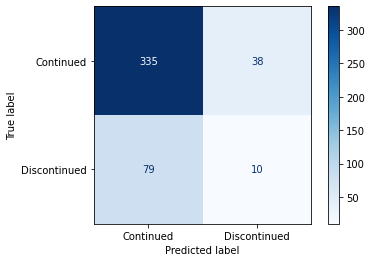

In [3]:
from sklearn.svm import SVC #import the SVC classifier

tuned_parameters = [{
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'sigmoid', 'poly'],
    'degree': [i for i in range(1,11,1)]
    }]

clf = GridSearchCV(SVC(), tuned_parameters, scoring='f1_weighted')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [4]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
X = np.concatenate((X_train, X_test), axis=0)
Y = np.concatenate((y_train, y_test), axis=0)

scoring = ['f1_weighted','balanced_accuracy']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_weighted', scores['test_f1_weighted'])
print('mean f1 ', np.mean(scores['test_f1_weighted']))
      
print('test_balanced_accuracy', scores['test_balanced_accuracy'])
print('mean acc1 ', np.mean(scores['test_balanced_accuracy']))

['fit_time', 'score_time', 'test_balanced_accuracy', 'test_f1_weighted']
test_f1_weighted [0.73516531 0.76923782 0.72752232 0.74368712 0.71756143]
mean f1  0.7386348000065235
test_balanced_accuracy [0.52763597 0.56221496 0.52002688 0.53844086 0.49436167]
mean acc1  0.5285360688242308


# With SMOTE Oversampling

In [5]:
X_train = np.load('Data/X_train_smote.npy', allow_pickle= True)
y_train = np.load('Data/Y_train_smote.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

1738 1738 462 462


Best parameters set found on development set:
 {'C': 100, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}

 Best Score 0.8753548247351643

 Grid scores on development set:
0.691 (+/-0.027) for {'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}
0.333 (+/-0.003) for {'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'sigmoid'}
0.638 (+/-0.014) for {'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}
0.630 (+/-0.012) for {'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.593 (+/-0.007) for {'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}
0.619 (+/-0.018) for {'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}
0.494 (+/-0.133) for {'C': 0.1, 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.490 (+/-0.130) for {'C': 0.1, 'degree': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}
0.491 (+/-0.131) for {'C': 0.1, 'degree': 1, 'gamma': 0.01, 'kernel': 'poly'}
0.491 (+/-0.131) for {'C': 0.1, 'degree': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.491 (+/-0.131) for {'C': 0.1, 'degree': 1, 'gamma': 0.001,


Training Score:  0.9971231062242542


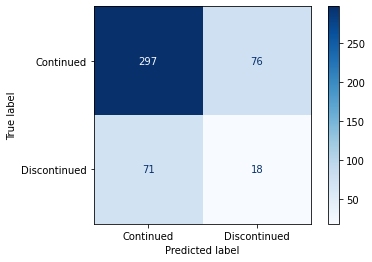

In [6]:
from sklearn.svm import SVC #import the SVC classifier

tuned_parameters = [{
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'sigmoid', 'poly'],
    'degree': [i for i in range(1,11,1)]
    }]

clf = GridSearchCV(SVC(), tuned_parameters, scoring='f1_weighted')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [7]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
X = np.concatenate((X_train, X_test), axis=0)
Y = np.concatenate((y_train, y_test), axis=0)

scoring = ['f1_weighted','balanced_accuracy']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_weighted', scores['test_f1_weighted'])
print('mean f1 ', np.mean(scores['test_f1_weighted']))
      
print('test_balanced_accuracy', scores['test_balanced_accuracy'])
print('mean acc1 ', np.mean(scores['test_balanced_accuracy']))

['fit_time', 'score_time', 'test_balanced_accuracy', 'test_f1_weighted']
test_f1_weighted [0.83028914 0.83254348 0.89812933 0.86160932 0.73590015]
mean f1  0.8316942825607473
test_balanced_accuracy [0.83537291 0.83860048 0.90574597 0.8734879  0.72547043]
mean acc1  0.8357355363015989


# With Borderline-SMOTE Oversampling

In [8]:
X_train = np.load('Data/X_train_borderline_smote.npy', allow_pickle= True)
y_train = np.load('Data/Y_train_borderline_smote.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

1738 1738 462 462


Best parameters set found on development set:
 {'C': 100, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}

 Best Score 0.8790126640679381

 Grid scores on development set:
0.711 (+/-0.021) for {'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}
0.334 (+/-0.003) for {'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'sigmoid'}
0.647 (+/-0.020) for {'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}
0.638 (+/-0.021) for {'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.607 (+/-0.010) for {'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}
0.625 (+/-0.017) for {'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}
0.502 (+/-0.140) for {'C': 0.1, 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.503 (+/-0.141) for {'C': 0.1, 'degree': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}
0.503 (+/-0.141) for {'C': 0.1, 'degree': 1, 'gamma': 0.01, 'kernel': 'poly'}
0.503 (+/-0.141) for {'C': 0.1, 'degree': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.503 (+/-0.141) for {'C': 0.1, 'degree': 1, 'gamma': 0.001,


Training Score:  0.9971231062242542


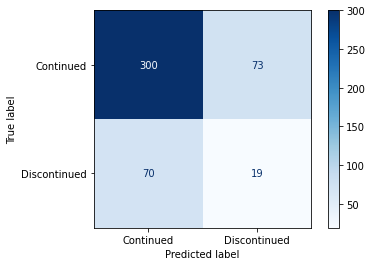

In [9]:
from sklearn.svm import SVC #import the SVC classifier

tuned_parameters = [{
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'sigmoid', 'poly'],
    'degree': [i for i in range(1,11,1)]
    }]

clf = GridSearchCV(SVC(), tuned_parameters, scoring='f1_weighted')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [10]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
X = np.concatenate((X_train, X_test), axis=0)
Y = np.concatenate((y_train, y_test), axis=0)

scoring = ['f1_weighted','balanced_accuracy']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_weighted', scores['test_f1_weighted'])
print('mean f1 ', np.mean(scores['test_f1_weighted']))
      
print('test_balanced_accuracy', scores['test_balanced_accuracy'])
print('mean acc1 ', np.mean(scores['test_balanced_accuracy']))

['fit_time', 'score_time', 'test_balanced_accuracy', 'test_f1_weighted']
test_f1_weighted [0.81670895 0.86850881 0.90266521 0.87770706 0.73945858]
mean f1  0.8410097194542315
test_balanced_accuracy [0.82088564 0.88048529 0.90977823 0.88642473 0.72983871]
mean acc1  0.8454825190815617


# With ADASYN Oversampling

In [11]:
X_train = np.load('Data/X_train_adasyn.npy', allow_pickle= True)
y_train = np.load('Data/Y_train_adasyn.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

1686 1686 462 462


Best parameters set found on development set:
 {'C': 100, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}

 Best Score 0.8784839815080885

 Grid scores on development set:
0.658 (+/-0.011) for {'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}
0.351 (+/-0.001) for {'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'sigmoid'}
0.616 (+/-0.024) for {'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}
0.606 (+/-0.026) for {'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.525 (+/-0.013) for {'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}
0.597 (+/-0.027) for {'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}
0.351 (+/-0.001) for {'C': 0.1, 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.351 (+/-0.001) for {'C': 0.1, 'degree': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}
0.351 (+/-0.001) for {'C': 0.1, 'degree': 1, 'gamma': 0.01, 'kernel': 'poly'}
0.351 (+/-0.001) for {'C': 0.1, 'degree': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.351 (+/-0.001) for {'C': 0.1, 'degree': 1, 'gamma': 0.001,


Training Score:  0.9976276811356667


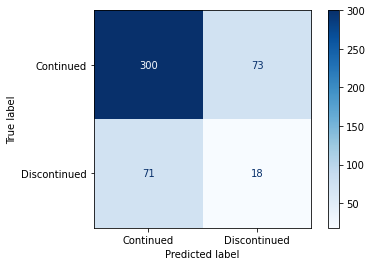

In [12]:
from sklearn.svm import SVC #import the SVC classifier

tuned_parameters = [{
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'sigmoid', 'poly'],
    'degree': [i for i in range(1,11,1)]
    }]

clf = GridSearchCV(SVC(), tuned_parameters, scoring='f1_weighted')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [13]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
X = np.concatenate((X_train, X_test), axis=0)
Y = np.concatenate((y_train, y_test), axis=0)

scoring = ['f1_weighted','balanced_accuracy']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_weighted', scores['test_f1_weighted'])
print('mean f1 ', np.mean(scores['test_f1_weighted']))
      
print('test_balanced_accuracy', scores['test_balanced_accuracy'])
print('mean acc1 ', np.mean(scores['test_balanced_accuracy']))

['fit_time', 'score_time', 'test_balanced_accuracy', 'test_f1_weighted']
test_f1_weighted [0.84053551 0.84501977 0.87747442 0.86537556 0.74027666]
mean f1  0.8337363844357706
test_balanced_accuracy [0.8493754  0.85791786 0.88583392 0.88082561 0.7257619 ]
mean acc1  0.8399429384534483
